In [91]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

In [93]:


# Connect to database
conn = sqlite3.connect("coffee_sales.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")

# Coffee products and prices
coffee_menu = [
    ("Espresso", 3.0),
    ("Latte", 4.0),
    ("Cappuccino", 4.5),
    ("Americano", 3.5),
    ("Mocha", 5.0),
    ("Macchiato", 3.8)
]

sales_data = []
start_date = datetime.today() - timedelta(days=30)

for _ in range(100):
    product, price = random.choice(coffee_menu)
    quantity = random.randint(1, 5)
    sale_date = (start_date + timedelta(days=random.randint(0, 30))).strftime("%Y-%m-%d")
    sales_data.append((product, quantity, price, sale_date))

# Insert into database
cursor.executemany("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sales_data)
conn.commit()

print(" Coffee sales dataset created with 100 rows.")


✅ Coffee sales dataset created with 100 rows.


In [95]:
df = pd.read_sql_query("SELECT * FROM sales limit 30", conn)
df


,id,product,quantity,price,sale_date
0,1,Latte,2,4.0,2025-07-26
1,2,Mocha,5,5.0,2025-08-05
2,3,Macchiato,5,3.8,2025-07-28
3,4,Espresso,4,3.0,2025-08-08
4,5,Latte,3,4.0,2025-08-12
5,6,Espresso,5,3.0,2025-08-04
6,7,Cappuccino,5,4.5,2025-07-29
7,8,Americano,5,3.5,2025-08-01
8,9,Macchiato,5,3.8,2025-07-16
9,10,Macchiato,2,3.8,2025-08-07


In [97]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df_summary = pd.read_sql_query(query, conn)
print(df_summary)


      product  total_qty  revenue
0       Mocha        149    745.0
1  Cappuccino        151    679.5
2   Americano        180    630.0
3   Macchiato        162    615.6
4       Latte        127    508.0
5    Espresso        132    396.0


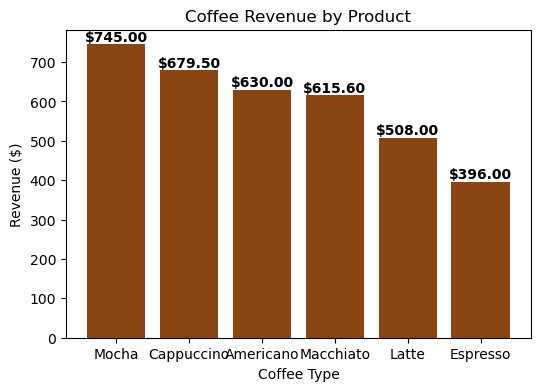

In [101]:
plt.figure(figsize=(6, 4))
bars = plt.bar(df_summary['product'], df_summary['revenue'], color='saddlebrown')

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (middle of bar)
        height,                             # Y position (top of bar)
        f"${height:.2f}",                   # Label text
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.xlabel("Coffee Type")
plt.ylabel("Revenue ($)")
plt.title("Coffee Revenue by Product")
plt.show()



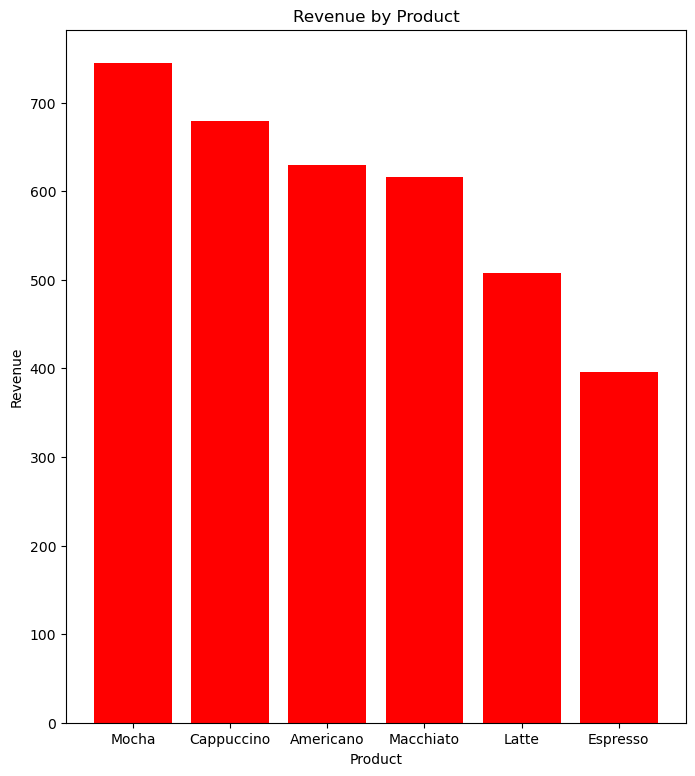

In [103]:
plt.figure(figsize=(8, 9))
plt.bar(df_summary['product'], df_summary['revenue'], color='red')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.savefig("sales_chart.png")
plt.show()
conn.close()


In [99]:
query="""
select product,
count(quantity) as count
from sales
group by product
order by count desc
""" 
count=pd.read_sql_query(query, conn)
print(count)

      product  count
0   Americano     57
1       Mocha     53
2   Macchiato     51
3  Cappuccino     49
4    Espresso     48
5       Latte     42


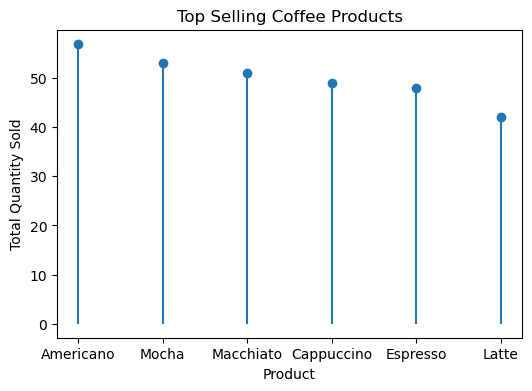

In [111]:
plt.figure(figsize=(6,4))
plt.stem(count['product'], count['count'], basefmt=" ")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Top Selling Coffee Products")
plt.show()


In [71]:
#fruits sales
# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Apples", 10, 2.5),
    ("Apples", 5, 2.5),
    ("Bananas", 8, 1.5),
    ("Bananas", 15, 1.5),
    ("Cherries", 12, 3.0),
    ("Cherries", 7, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [73]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Apples,30,75.0
1,Bananas,46,69.0
2,Cherries,38,114.0


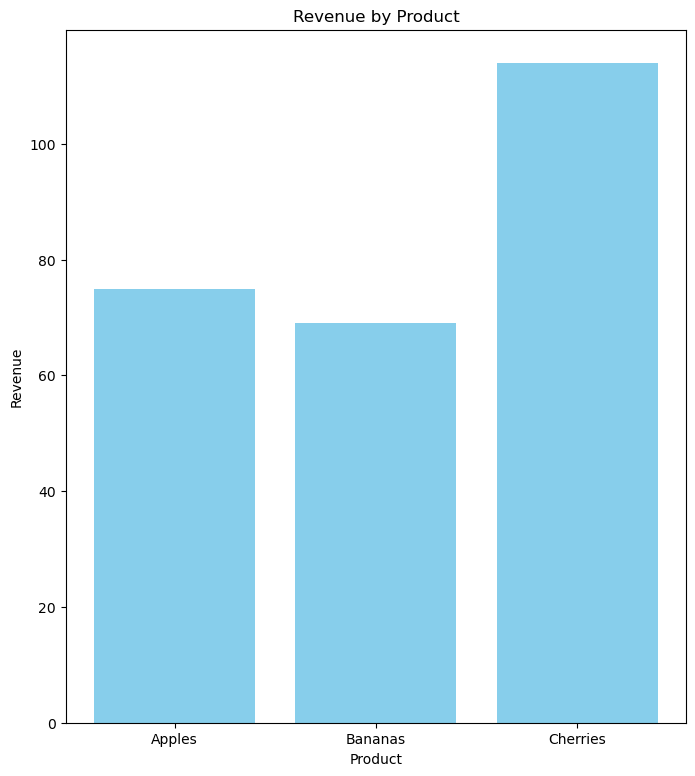

In [79]:
plt.figure(figsize=(8, 9))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.savefig("sales_chart.png")
plt.show()
conn.close()

